In [71]:
import pandas as pd

In [72]:
df = pd.read_csv('cleantweet.csv')

In [73]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
Unnamed: 0    1600000 non-null int64
sentiment     1600000 non-null int64
text          1600000 non-null object
dtypes: int64(2), object(1)
memory usage: 36.6+ MB


,Unnamed: 0,sentiment,text
0,0,0,a thats a bummer you shoulda got david car...
1,1,0,is upset that he cant update his facebook by t...
2,2,0,i dived many times for the ball managed to sa...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,no its not behaving at all im mad why am i he...


In [75]:
x = df.text
y = df.sentiment

In [76]:

from sklearn.cross_validation import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [77]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [78]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [81]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(1000,10000,1000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print ((classifier))
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

# TF-IDF Modelling


TFIDF is another way to convert textual data to numeric form, and is short for Term Frequency-Inverse Document Frequency. The vector value it yields is the product of these two terms; TF and IDF.
Let’s first look at Term Frequency. We have already looked at term frequency with count vectorizer, but this time, we need one more step to calculate the relative frequency. Let’s say we have two documents in our corpus as below.
I love dogs
I hate dogs and knitting
Relative term frequency is calculated for each term within each document as below.

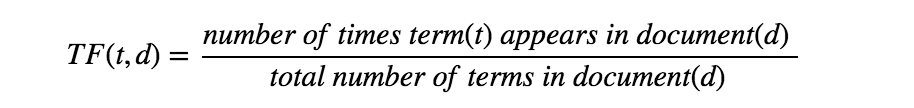




Next, we need to get Inverse Document Frequency, which measures how important a word is to differentiate each document by following the calculation as below.


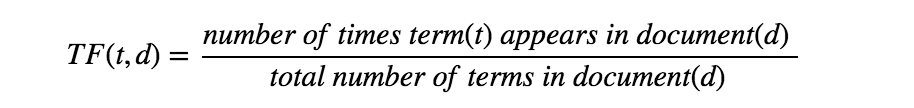


Once we have the values for TF and IDF, now we can calculate TFIDF as below.


Following the case of our example, TFIDF for the term ‘I’ in both documents will be as below.


As you can see, the term ‘I’ appeared equally in both documents, and the TFIDF score is 0, which means the term is not really informative in differentiating documents. The rest is same as count vectorizer, TFIDF vectorizer will calculate these scores for terms in documents, and convert textual data into the numeric form.
Once I instantiate Tfidf vectorizer, and fit the Tfidf-transformed data to logistic regression, and check the validation accuracy for a different number of features.

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [83]:
%%time
print("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 50.68%
accuracy score: 76.46%
model is 25.78% more accurate than null accuracy
train and test time: 45.42s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.68%
accuracy score: 77.83%
model is 27.16% more accurate than null accuracy
train and test time: 45.50s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.68%
accuracy score: 78.50%
model is 27.82% more accurate than null accuracy
train and test time: 50.18s
-----------------------------------------------------

In [84]:
%%time
print("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 50.68%
accuracy score: 76.23%
model is 25.56% more accurate than null accuracy
train and test time: 101.87s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.68%
accuracy score: 77.95%
model is 27.27% more accurate than null accuracy
train and test time: 113.70s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.68%
accuracy score: 78.72%
model is 28.05% more accurate than null accuracy
train and test time: 112.72s
---------------------------------------------------

In [85]:
%%time
print("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 50.68%
accuracy score: 76.13%
model is 25.46% more accurate than null accuracy
train and test time: 262.88s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.68%
accuracy score: 77.91%
model is 27.24% more accurate than null accuracy
train and test time: 270.72s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.68%
accuracy score: 78.67%
model is 28.00% more accurate than null accuracy
train and test time: 280.98s
--------------------------------------------------

In [86]:
import matplotlib.pyplot as plt

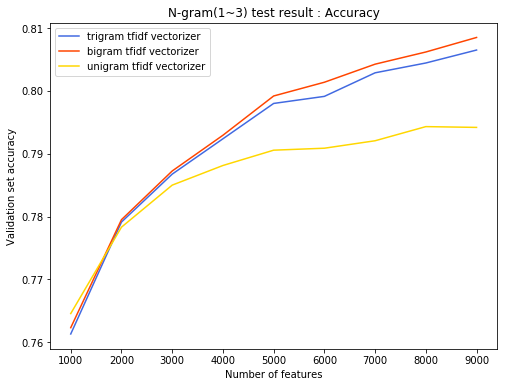

In [87]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
#plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
#plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
#plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [89]:
tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [90]:
%%time
trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
null accuracy: 50.68%
accuracy score: 82.90%
model is 32.22% more accurate than null accuracy
train and test time: 230.83s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 50.68%
accuracy score: 82.58%
model is 31.91% more accurate than null accuracy
train and test time: 751.82s
--------------------------------------------------------------------------------
Validation result for LinearSVC with 

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


null accuracy: 50.68%
accuracy score: 76.53%
model is 25.86% more accurate than null accuracy
train and test time: 387.81s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=None, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)


C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


null accuracy: 50.68%
accuracy score: 79.70%
model is 29.03% more accurate than null accuracy
train and test time: 318.88s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
null accuracy: 50.68%
accuracy score: 72.47%
model is 21.80% more accurate than null accuracy
train and test time: 319.16s
--------------------------------------------------------------------------------
Wall time: 1h 31min 2s


In [91]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=10000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print("Validation result for {}".format(label))
    print (clf)
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
null accuracy: 50.68%
accuracy score: 82.90%
model is 32.22% more accurate than null accuracy
train and test time: 331.98s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 50.68%
accuracy score: 82.27%
model is 31.60% more accurate than null accuracy
train and test time: 959.44s
--------------------------------------------------------------------------------
Validation result for Multinomial NB


C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


null accuracy: 50.68%
accuracy score: 79.65%
model is 28.97% more accurate than null accuracy
train and test time: 219.05s
--------------------------------------------------------------------------------
Validation result for Ensemble
VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svc', Linear...   n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)


C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


null accuracy: 50.68%
accuracy score: 82.55%
model is 31.87% more accurate than null accuracy
train and test time: 1051.89s
--------------------------------------------------------------------------------


C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [115]:
MLA = pd.DataFrame({
    "Name" : ['LogisticRegression','LinearSVC','MultinomialNB','RidgeClassifier','PassiveAggressiveClassifier','Ensemble'],
    "Accuracy" : [82.90,82.27,80.74,82.23,79.65,82.55]
})
#MLA.head()
#Name = ['LogisticRegression','LinearSVC','MultinomialNB','RidgeClassifier','PassiveAggressiveClassifier','Ensemble']
#Accuracy = ['82.90','82.27','80.74','82.23','79.65','82.55']
MLA.dtypes



Name         object
Accuracy    float64
dtype: object

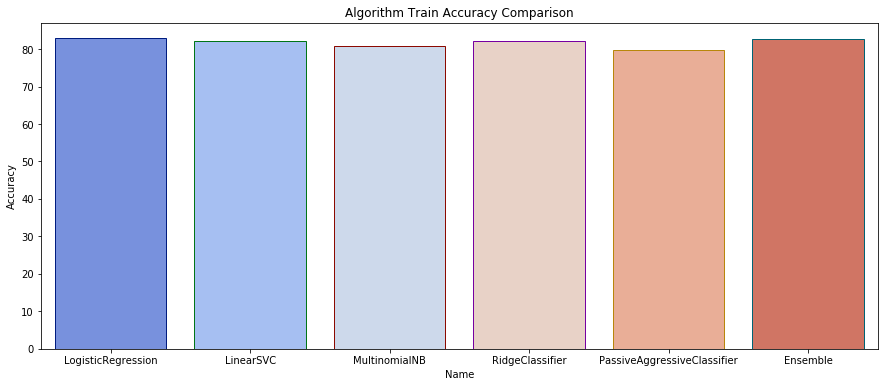

In [126]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Accuracy",data=MLA,palette='coolwarm',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=0)
plt.title('Algorithm Train Accuracy Comparison')
plt.show()